In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv("../dataset/Mall_Customers.csv")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [76]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [77]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
df.rename({'Annual Income (k$)':'Income', 
           'Spending Score (1-100)':'Spend_score'}, 
          axis=1,
          inplace=True)

Text(0.5, 0, 'Income')

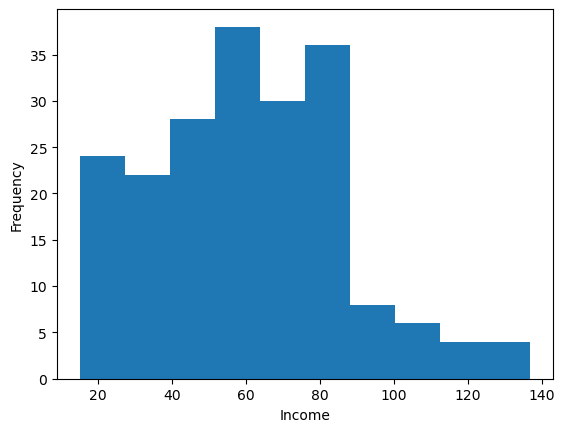

In [79]:
df.Income.plot.hist()
plt.xlabel('Income')

<Axes: xlabel='Income', ylabel='Spend_score'>

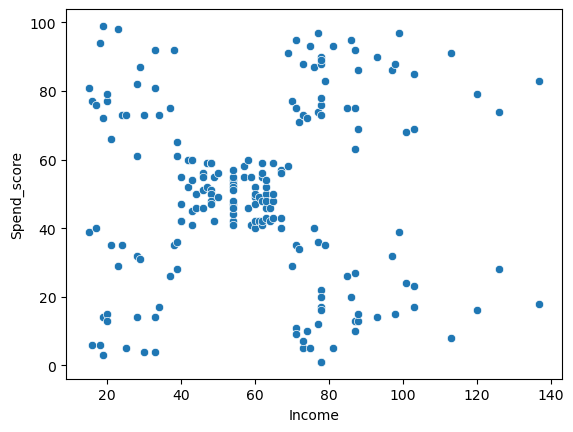

In [80]:
sns.scatterplot(data=df, x='Income', y='Spend_score')

In [81]:
df['Cluster'] = np.where(
    df['Income'] >= 90, 'High Income', np.where(
        df.Income < 50, 'Moderate Income', 'Low Income')
    )

df.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High Income,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0
Moderate Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = ['Age', 'Income', 'Spend_score']
df_scaled = df[cols_to_scale].copy()

df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

In [109]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=5, random_state=42)
cluster_cols = ['Income', 'Spend_score']

kmean.fit(df_scaled[cluster_cols])
df_scaled['Cluster'] = kmean.predict(df_scaled[cluster_cols])

/Users/krit/homebrew/anaconda3/envs/dataeng/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Income', ylabel='Spend_score'>

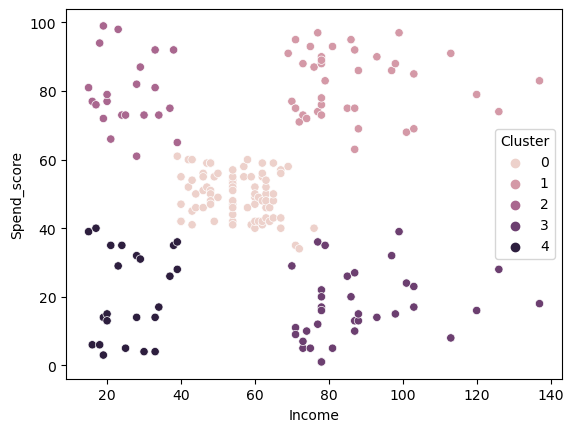

In [110]:
sns.scatterplot(data=df, x='Income', y='Spend_score', hue='Cluster')

<Axes: xlabel='Cluster'>

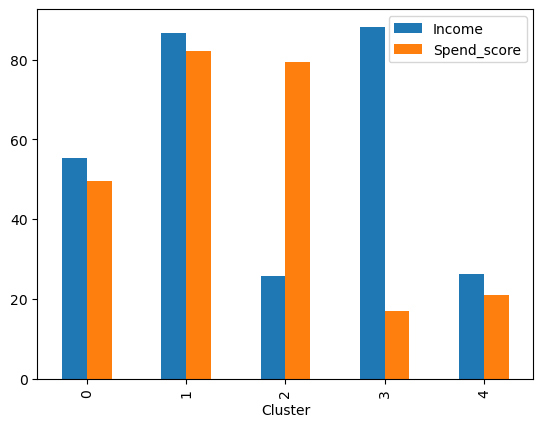

In [111]:
df['Cluster'] = df_scaled.Cluster
df.groupby('Cluster')[['Income', 'Spend_score']].mean().plot.bar()

1 vs 3
0
2 vs 4
Is that means not only income that influence spend_score

In [112]:
cols = ['Age', 'Income', 'Spend_score']

kmean.fit(df_scaled[cluster_cols])
df_scaled['Cluster'] = kmean.predict(df_scaled[cluster_cols])

/Users/krit/homebrew/anaconda3/envs/dataeng/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [118]:
kmean = KMeans(n_clusters=4, random_state=42)
kmean.fit(df_scaled[cols])
df_scaled['Cluster'] = kmean.predict(df_scaled[cols])

/Users/krit/homebrew/anaconda3/envs/dataeng/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [119]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(df_scaled[cols])
df_scaled['pc1'] = pca_res[:,0]
df_scaled['pc2'] = pca_res[:,1]

Text(0, 0.5, 'PC2')

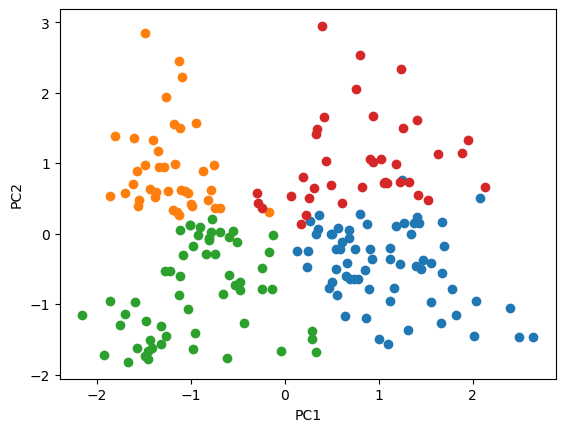

In [120]:
for clust in range(4):
    temp = df_scaled[df_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2,
                label="Cluster "+str(clust)
                )
    
plt.xlabel('PC1')
plt.ylabel('PC2')

In [121]:
df['Cluster'] = df_scaled.Cluster
df.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean()

,Age,Income,Spend_score
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


<Axes: xlabel='Cluster'>

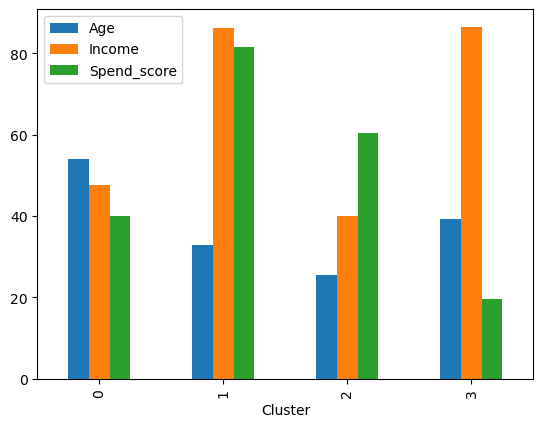

In [122]:
df.groupby('Cluster')[['Age', 'Income','Spend_score']].mean().plot.bar()

- 2 = First jobber
- 1 = Senior
- 3 = Associate or with dependents?
- 4 = Entering retirement with dependents?